In [19]:
# Importing libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import PIL 
import tensorflow as tf 
import glob
from pathlib import Path
import keras_tuner as kt
import random
import seaborn as sns
from PIL import Image
from typing import Dict, List
  
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

In [6]:
data_dir = "/Users/mlopez/Downloads/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = Path(os.path.join(data_dir, "train"))
valid_dir = Path(os.path.join(data_dir, "valid"))
diseases = os.listdir(train_dir)
jpg_train_files = list(Path(train_dir).rglob('*/*.jpg'))
len(jpg_train_files) 

2447

In [7]:
batch_size = 32
img_height = 256
img_width = 256

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 70295 files belonging to 38 classes.


In [9]:
# load the trained model
new_model = tf.keras.models.load_model('my_model.keras')

# define class labels
class_labels = train_ds.class_names

# Show the model architecture
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,468 (42.47 MB)

 Trainable params: 3,710,822 (14.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,421,646 (28.31 MB)

In [14]:
name_id_map = dict(zip(range(len(class_labels)), class_labels))
print(name_id_map)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [11]:
# prediction function on single image
def predict_image(image_path, model):
    # open and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    im_class = tf.argmax(predictions[0], axis=-1)
    class_title = name_id_map.get(int(im_class))

    # display the image with prediction and confidence
    plt.imshow(np.squeeze(img_array.numpy().astype("uint8")))
    plt.title(f"Class Predicted: {class_title}")
    plt.axis("off")
    plt.savefig("ProcessedImage.png")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


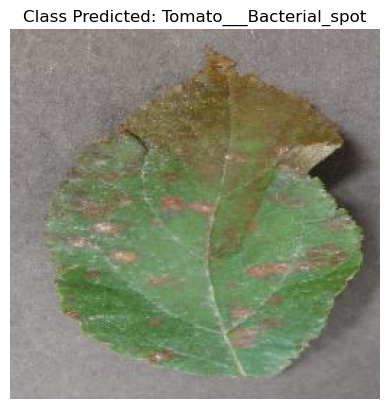

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


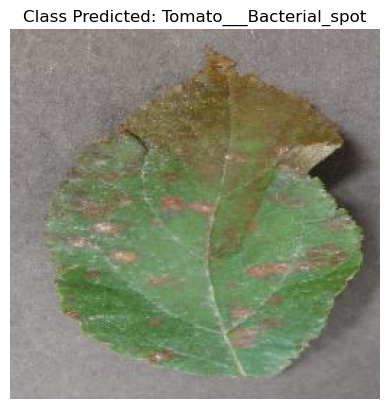

None


In [17]:
# Prediction Testing 1 Image at a Time
# apple cedar rust prediction
image_path = "/Users/mlopez/Downloads/archive/test/test/AppleCedarRust4.JPG"
predict_image(image_path, new_model)
print(predict_image(image_path, new_model))